In [1]:
import numpy as np
import librosa 
import soundfile as sf
import librosa.display
import matplotlib.pyplot as plt
import json
import math
import os

In [2]:
def _plot_signal_and_augmented_signal(signal, augmented_signal, sr):
    fig, ax = plt.subplots(nrows=2)
    librosa.display.waveshow(signal, sr=sr, ax=ax[0])
    ax[0].set(title="Original signal")
    librosa.display.waveshow(augmented_signal, sr=sr, ax=ax[1])
    ax[1].set(title="Augmented signal")
    plt.show()

In [2]:
def add_white_noise(signal, noise_factor):
    noise = np.random.normal(0, signal.std(), signal.size)
    augmented_signal = signal + noise * noise_factor
    return augmented_signal

In [3]:
def apply_time_stretch(signal, stretch_rate):
    return librosa.effects.time_stretch(signal, rate=stretch_rate)

In [4]:
def apply_pitch_scale(signal, sr, num_semitones):
    return librosa.effects.pitch_shift(signal, sr=sr, n_steps=num_semitones)

In [6]:
# polarity inversion
def invert_polarity(signal):
    return signal * -1

In [7]:
# random gain (reducing or extending amplitude)
def random_gain(signal, min_gain_factor, max_gain_factor):
    gain_factor = np.random.uniform(min_gain_factor, max_gain_factor)
    return signal * gain_factor

In [5]:
DATASET_PATH = "data_original\genres_original"
JSON_PATH_train = "oye_combined_augmented.json"
JSON_PATH_test = "oye_combined.json"

SAMPLE_RATE = 22050
DURATION = 30
SAMPLES_PER_TRACK = SAMPLE_RATE * DURATION

In [7]:
def save_mfcc_chroma_test(dataset_path, json_path, n_mfcc=13, n_fft=2048, hop_length=512, num_segments=10):
    data = {
        "mapping": [],
        "labels": [],
        "features": [],
    }

    num_samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    expected_num_vectors_per_segment = math.ceil(num_samples_per_segment / hop_length)

    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
        if dirpath != dataset_path:
            label = os.path.split(dirpath)[-1]
            data["mapping"].append(label)
            print(f"\nProcessing {label}")

            for f in filenames:
                file_path = os.path.join(dirpath, f)
                signal, sr = librosa.load(file_path, sr=SAMPLE_RATE)

                for s in range(num_segments):
                    start_sample = num_samples_per_segment * s
                    finish_sample = start_sample + num_samples_per_segment
                    segment = signal[start_sample:finish_sample]

                    mfcc = librosa.feature.mfcc(y=segment, sr=sr, n_fft=n_fft, n_mfcc=n_mfcc, hop_length=hop_length)
                    chroma = librosa.feature.chroma_stft(y=segment, sr=sr, n_fft=n_fft, hop_length=hop_length)

                    combined = np.vstack((mfcc, chroma)).T

                    if len(combined) == expected_num_vectors_per_segment:
                        data["features"].append(combined.tolist())
                        data["labels"].append(i - 1)
                        print(f"{file_path}, segment:{s+1}")

    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)

def save_mfcc_chroma_train(dataset_path, json_path, n_mfcc=13, n_fft=2048, hop_length=512, num_segments=10):
    data = {
        "mapping": [],
        "labels": [],
        "features": [],
    }

    num_samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    expected_num_vectors_per_segment = math.ceil(num_samples_per_segment / hop_length)

    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
        if dirpath != dataset_path:
            label = os.path.split(dirpath)[-1]
            data["mapping"].append(label)
            print(f"\nProcessing {label}")

            for f in filenames:
                file_path = os.path.join(dirpath, f)
                signal, sr = librosa.load(file_path, sr=SAMPLE_RATE)

                augmented_signals = [
                    signal,
                    add_white_noise(signal, 0.1),
                    apply_time_stretch(signal, 0.8),
                    apply_pitch_scale(signal, sr, -2)
                ]

                for aug_signal in augmented_signals:
                    for s in range(num_segments):
                        start_sample = num_samples_per_segment * s
                        finish_sample = start_sample + num_samples_per_segment
                        segment = aug_signal[start_sample:finish_sample]

                        mfcc = librosa.feature.mfcc(y=segment, sr=sr, n_fft=n_fft, n_mfcc=n_mfcc, hop_length=hop_length)
                        chroma = librosa.feature.chroma_stft(y=segment, sr=sr, n_fft=n_fft, hop_length=hop_length)

                        combined = np.vstack((mfcc, chroma)).T

                        if len(combined) == expected_num_vectors_per_segment:
                            data["features"].append(combined.tolist())
                            data["labels"].append(i - 1)
                            print(f"{file_path}, aug_segment:{s+1}")

    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)


In [8]:
if __name__ == "__main__":
    save_mfcc_chroma_train(DATASET_PATH, JSON_PATH_train)
    save_mfcc_chroma_test(DATASET_PATH, JSON_PATH_test)


Processing blues
data_original\genres_original\blues\blues.00000.wav, aug_segment:1
data_original\genres_original\blues\blues.00000.wav, aug_segment:2
data_original\genres_original\blues\blues.00000.wav, aug_segment:3
data_original\genres_original\blues\blues.00000.wav, aug_segment:4
data_original\genres_original\blues\blues.00000.wav, aug_segment:5
data_original\genres_original\blues\blues.00000.wav, aug_segment:6
data_original\genres_original\blues\blues.00000.wav, aug_segment:7
data_original\genres_original\blues\blues.00000.wav, aug_segment:8
data_original\genres_original\blues\blues.00000.wav, aug_segment:9
data_original\genres_original\blues\blues.00000.wav, aug_segment:10
data_original\genres_original\blues\blues.00000.wav, aug_segment:1
data_original\genres_original\blues\blues.00000.wav, aug_segment:2
data_original\genres_original\blues\blues.00000.wav, aug_segment:3
data_original\genres_original\blues\blues.00000.wav, aug_segment:4
data_original\genres_original\blues\blues.0

In [16]:
from librosa.feature import mfcc

In [22]:
def save_mfcc(dataset_path, json_path, n_mfcc=13, n_fft=2048, hop_length=512, num_segments=10):

    # dictionary to store data
    global mfc
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": [],
    }

    num_samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    expected_num_mfcc_vectors_per_segment = math.ceil(num_samples_per_segment / hop_length)

    # Loop through all the genres
    # For each iteration we are in a different genre
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        # ensure that we are not at the root level
        if dirpath is not dataset_path:

            # save the semantic label
            dirpath_components = os.path.split(dirpath) # genre/blues => ["genre", "blues"]
            semantic_label = dirpath_components[-1]
            data["mapping"].append(semantic_label)
            print("\nProcessing {}".format(semantic_label))

            # process files for a specific genre
            for f in filenames:

                # load audio file
                file_path = os.path.join(dirpath, f)
                signal, sr = librosa.load(file_path, sr=SAMPLE_RATE)

                # Apply data augmentation techniques
                augmented_signals = [
                    signal,  # Original
                    add_white_noise(signal, 0.1),
                    apply_time_stretch(signal, 0.8),
                    apply_pitch_scale(signal, sr, -2)
                ]

                # process segments extracting mfcc and storing data
                for augmented_signal in augmented_signals:
                    for s in range(num_segments):
                        start_sample = num_samples_per_segment * s
                        finish_sample = start_sample + num_samples_per_segment

                        mfc = mfcc(y=augmented_signal[start_sample:finish_sample],
                                                    sr=sr,
                                                    n_fft = n_fft,
                                                    n_mfcc = n_mfcc,
                                                    hop_length = hop_length
                                                    )

                        mfc = mfc.T

                        # store mfcc for segment if it has the expected length
                        if len(mfc) == expected_num_mfcc_vectors_per_segment:
                            # storing mfcc labels
                            data["mfcc"].append(mfc.tolist())
                            data["labels"].append(i-1)
                            print("{}, segment:{}".format(file_path, s+1))
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)

In [23]:
save_mfcc(DATASET_PATH, JSON_PATH)


Processing blues
data_original\genres_original\blues\blues.00000.wav, segment:1
data_original\genres_original\blues\blues.00000.wav, segment:2
data_original\genres_original\blues\blues.00000.wav, segment:3
data_original\genres_original\blues\blues.00000.wav, segment:4
data_original\genres_original\blues\blues.00000.wav, segment:5
data_original\genres_original\blues\blues.00000.wav, segment:6
data_original\genres_original\blues\blues.00000.wav, segment:7
data_original\genres_original\blues\blues.00000.wav, segment:8
data_original\genres_original\blues\blues.00000.wav, segment:9
data_original\genres_original\blues\blues.00000.wav, segment:10
data_original\genres_original\blues\blues.00000.wav, segment:1
data_original\genres_original\blues\blues.00000.wav, segment:2
data_original\genres_original\blues\blues.00000.wav, segment:3
data_original\genres_original\blues\blues.00000.wav, segment:4
data_original\genres_original\blues\blues.00000.wav, segment:5
data_original\genres_original\blues\

In [13]:
if __name__ == "__main__":
    
    signal, sr = librosa.load("blues_guitar_riff.wav")
    #augmented_signal = add_white_noise(signal, 0.1)
    
    #augmented_signal = apply_time_stretch(signal, 0.8)
    
    #augmented_signal = apply_pitch_scale(signal, sr, -2)
    
    augmented_signal = random_gain(signal, 2, 4)
    sf.write("augmented.wav", augmented_signal, sr)

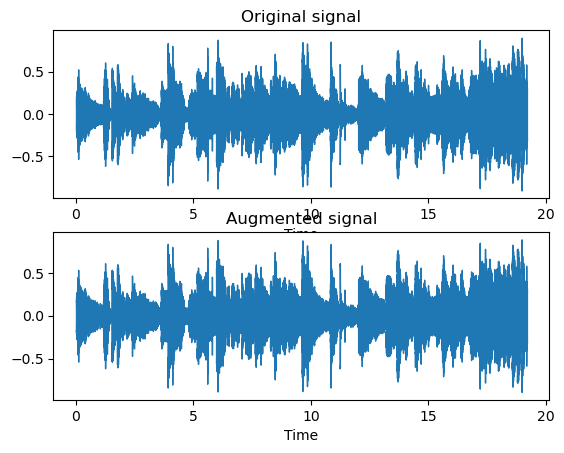

In [10]:
_plot_signal_and_augmented_signal(signal, augmented_signal, sr)